# Temporal irradiance variability

In this tutorial you will calculate the temporal variability of GHI in Copenhagen.

The first step is to import a few Python packages.

In [ ]:
# Install pvlib on Google Colab as this is not a standard package.
!pip install pvlib

In [1]:
import pvlib  # library for PV and solar calculations
import pandas as pd  # library for data analysis
import matplotlib.pyplot as plt  # library for plotting
import numpy as np  # library for math and linear algebra

## Step 1: Download data for Copenhagen

Download TMY data for Copenhagen using [``pvlib.iotools.get_pvgis_tmy``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_tmy.html). Note that this function returns two items (data, meta); the first is the requested data and the second the relevant metadata.

In [33]:
# Copenhagen coordinates
latitude = 55.68
longitude = 12.56

# Get TMY from PVGIS (returns data, meta)
tmy, meta = pvlib.iotools.get_pvgis_tmy(latitude=latitude, longitude=longitude, startyear=2005, endyear=2023)

## Step 2: Investigate the metadata and plot GHI

Which months and years were used to create the TMY file for Copenhagen (look at the metadata)? Plot the GHI and visualy inspect the seasonal variability.

In [3]:
# Write your code here



## Step 3: Yearly variability

Download hourly data for Copenhagen using [``pvlib.iotools.get_pvgis_hourly``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_hourly.html) from 2005 to 2023. Note that ``pvgis`` returns the POA irradiance. However, setting a ``surface_tilt`` of zero, will return the POA for a horizontal surface (i.e., the GHI). Note that it also returns the irradiance components (i.e., direct and diffuse) so to find the GHI the two components need to be added.

Perform the following calculations:
* Calculate and plot the yearly mean GHI
* Identify the years with the lowest and highest mean GHI
* Compare the mean yearly GHI values with the TMY value

In [34]:
hourly, meta = pvlib.iotools.get_pvgis_hourly(latitude = latitude,
                                          longitude = longitude,
                                          start = 2005,
                                          end = 2023,
                                          surface_tilt = 0)

hourly['ghi'] = hourly['poa_direct'] + hourly['poa_sky_diffuse']

<Axes: xlabel='time'>

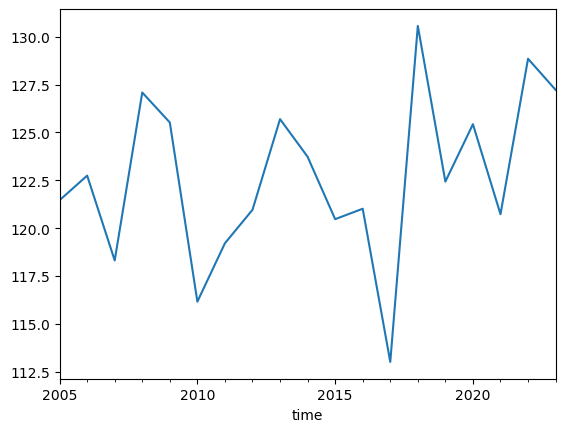

In [35]:
hourly['ghi'].resample('YE').mean().plot()

In [36]:
tmy['ghi'].mean()

120.72146118721462

## Step 4: Monthly variability

Create a boxplot showing the variability of GHI for each month.

<Figure size 1000x600 with 0 Axes>

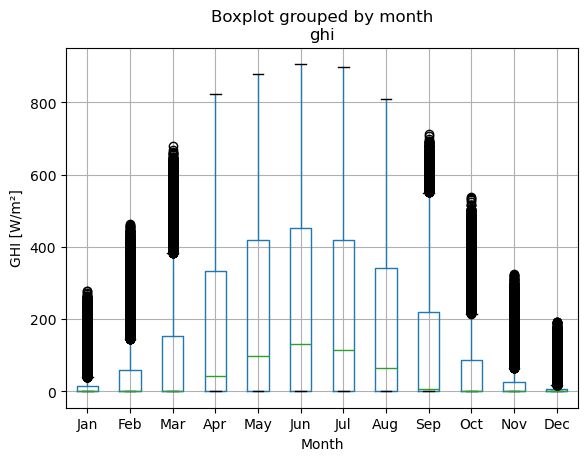

In [59]:
hourly['month'] = hourly.index.month

plt.figure(figsize=(10,6))
hourly.boxplot(column='ghi', by='month')
plt.xlabel('Month')
plt.ylabel('GHI [W/m²]')
plt.xticks(range(1,13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()